### TRPO


In [ ]:
### A2C or Advantage Actor critic, works as on-policy algorithms, i.e, they update on the current policy,
### The Critic is also updated on the same policy. 

### It works on the algorithm, as 

In [ ]:
import cv2
import matplotlib.pyplot as plt

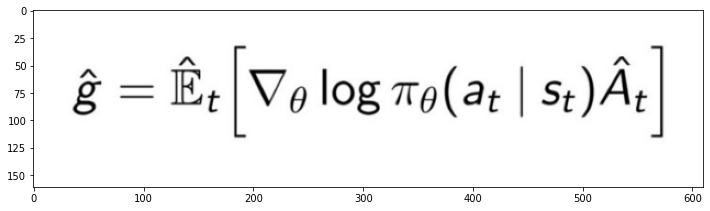

In [ ]:
img=cv2.imread("A2C.png")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### Now, if the advantage is large for even a single update, and the policy has one bad update 
### it is impossible to reach back the previous policy. And as it is a on-policy algorithm, we
### do not have any samples from the previous policy. So, then the policy can completely diverge.

### So, one way to prevent this from happening is if we constraint the actor from making drastic changes 
### or updates on the policy. This can be done by constraining the learning rate but that makes the learning 
### slower. So, else, we can put some constraints on the amount gradient change of the actor.

### It is done by using a KL divergence constraint on the ratio of the old policy and the new policy to
### restrict the change of the policy.

In [ ]:
### This will ensure monotonic improvements. 

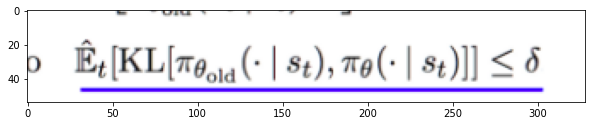

In [ ]:
img=cv2.imread("KL.png")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
### So, the old policy provides a probability distribution for all the actions on the state, and the new policy
### also gives the same. The above constraint makes sure, that the KL Divergence of the two distributions does not
### cross a given value of delta

In [ ]:
### The updated equation becomes

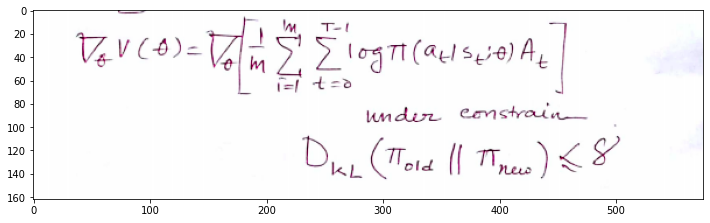

In [ ]:
img=cv2.imread("TRPO_1.png")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### So, the A2C loss under the constraint of KL Divergence. 

In [ ]:
### Another problem seen is, as we are using an on-policy algorithm, we will need to sample a whole lot of times
### from each policy, we need to sample, for multiple updates. This may be very time consuming and inefficient.

### This problem was solved by importance sampling.

### Importance sampling estimates the value functions for a policy π with samples collected previously from an older policy π’. 
### If the new action is relatively close to the old one, importance sampling allows us to calculate the new rewards based on 
### the old calculation. 

### We can reuse the  old samples to calculate the new policy return only if the two policies are close. If the policy diverges,
### accuracy decreases. 


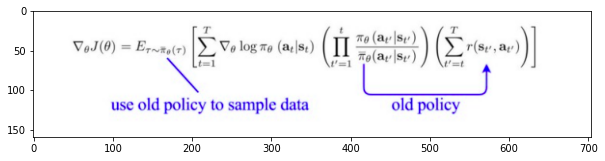

In [ ]:
img=cv2.imread("Sampling.png")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
### So basically, its like a ratio

### Importance sampling is a technique of estimating the expected value of f(x) 
### where x has a data distribution p. However, Instead of sampling from p, we 
### calculate the result from sampling q

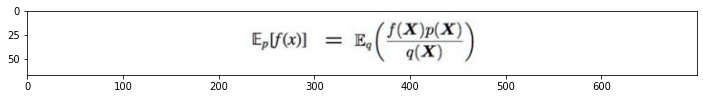

In [ ]:
img=cv2.imread("ration.jpeg")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### SO, we calculate Advantage for the old policy and find the advantage for the new policy 
### using the importance sampling.

In [ ]:
### So we try to maximize the estimated advantage for the new policy under a constraint KL divergence
### such that the new policy does not change so drastically that, we are unable to use importance sampling

In [ ]:
### So, the updated equation becomes

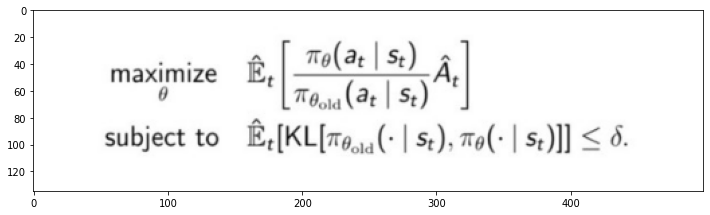

In [ ]:
img=cv2.imread("TRPO_2.png")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### Both of the above problems are solved by restricting the gradient by the KL Divergence constraints

In [ ]:
### The above algorithm is called "Trust Region Policy Optimization" or TRPO algorithm.

In [ ]:
### The region in which the local approximations of the function are accurate is a Trust region.

### As we create such a region between the old policy and the new policy using the divergence constraints
### The algorithm is so called.

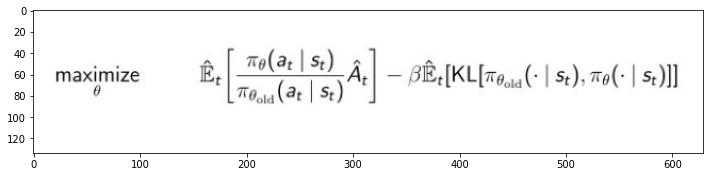

In [ ]:
img=cv2.imread("TRPO_final.png")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### The above equation is the final form of TRPO. If the whole value is maximized the KL divergence
### must be minimized, thus its a constraints. Beta is hyperparameter to control the weightage.


In [ ]:
### The problem with this kind of approach is KL divergence can requires quadratic optimization which requires
### conjugate gradient and takes a lot of time.

### PPO

In [ ]:
### TO solve the above problem Proximal Policy Gradient, was introduced, with an easier way to
### implement the KL divergence. In this case we clip the ratio of the new policy and the old policy 
### (Also called importance ratio) at a certain value. (1-E) to (1+E). So. if E =0.2 the ratio can have
### value from 0.8 to 1.2. So, the current Advantage can be at max be 1.2 times more. So, consequently,
### large gradient change is restricted and drastic policy change is averted.

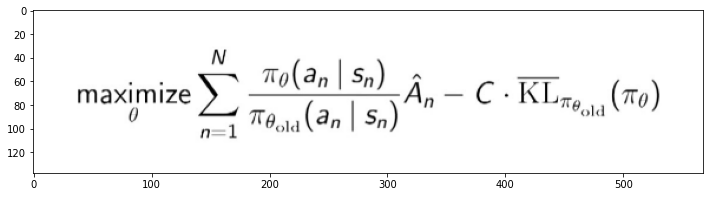

In [ ]:
img=cv2.imread("PPO_1.png")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### For this case, we have a single model, with two heads, a policy head and 
### a value head, the parameters for the networks are shared. (in case of CNNs and RNNs)

### In case of ANNs its better to use seperate actor critic networks

### The loss consists of three losses: L_CLIP, L_VF, L_S

In [ ]:
### L_CLIP is for the actor, or the policy head, so, it optimizes the the maximization of the Advantage
### with the clipping of the importance ratio under the constraint of KL divergence

### L_VF is for the critic or the value head, it minimizes the MSE between, Value of a state and return for the state

### L_S is for the entropy, it helps in exploration


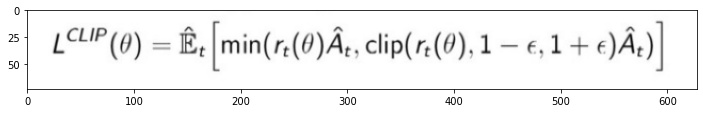

In [ ]:
img=cv2.imread("Clip.png")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### L clip is given as above, so, it is the minimum of unclipped ratio*Advantage, or the clipped value of the ratio and 
### the Advantage. 

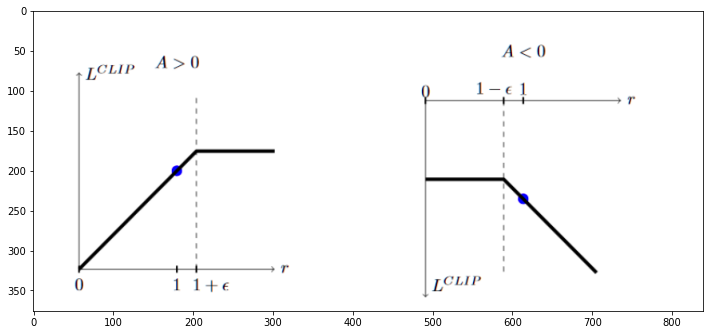

In [ ]:
img=cv2.imread("REP.png")
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
### The final loss is given as: L = L_Clip - c1.L_VF + c2.L_S

### C1=0.5 c2=0.001, weightage hyperparameter.

In [ ]:
### In case of PPO: we use ratio of old probability and the new probability as the importance ratio

### for importance ratio, we generally use tf.divide, and distribution.prob(a) for the loss function

### But instead, we use distribution.log_prob(a), we use exp(log_new_prob - log_old_prob)

### we take exponention of log of the probability so it becomes:

### exp(log_new_prob - log_old_prob) = exp(log_new_prob)/exp(log_old_prob) = new_prob/old_prob

### Cartpole

In [3]:
!git clone https://github.com/Stable-Baselines-Team/stable-baselines-tf2.git

Cloning into 'stable-baselines-tf2'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 116 (delta 40), reused 100 (delta 25), pack-reused 0
Receiving objects: 100% (116/116), 196.68 KiB | 2.69 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [4]:
!pip install ./stable-baselines-tf2

Processing ./stable-baselines-tf2
  Created wheel for stable-baselines: filename=stable_baselines-3.0.0a0-cp37-none-any.whl size=52566 sha256=0361a300845e66b04bdf5932ba4a2284a4ad40b4ee8da68ae94dd556f80baab5
  Stored in directory: /root/.cache/pip/wheels/93/bd/d9/da43c590bbaf7277ad7a7d3fd89a8a304caa8afa358b6ecf4f
Successfully built stable-baselines


In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from stable_baselines.common.vec_env import SubprocVecEnv  ### Subprocess environment
import pandas as pd
import functools
import operator

In [2]:
import gym

In [10]:
class PPO:

  def __init__(self,env,env_name,num_of_env):
    self.state_dimension=env.observation_space.shape   ### Input state dimension
    self.no_of_action=env.action_space.n               ### No of actions
    self.no_of_env=num_of_env
    self.Actor=None      ### the learner
    self.Critic=None     ### Critic
    self.max_steps=1000
    self.env=SubprocVecEnv([self.create_env(env_name,i,self.max_steps) for i in range(self.no_of_env)])
    self.opt=tf.keras.optimizers.Adam(0.0003)
    self.steps_in_epi=512    ### Fixed number of steps in a episode
    self.iterations=5000         ### Number of epochs
    self.goal=1000          ### max reward
    self.epochs=10
    

  def create_env(self,env_id,rank,steps,seed=101):
      def get_env():         #### The seed lets generate same sequence, and starting state is same and
      ### every time performance is same
        env=gym.make(env_id)
        env._max_episode_steps=steps
        env.seed(seed+rank)
        return env
      return get_env
    ### Creates the multiple environments

  def get_actor(self):

    input_layer=tf.keras.layers.Input(self.state_dimension)  ### Takes the state for which we want to 
    ### predict the probability distribution of the actions.

    layer_1=tf.keras.layers.Dense(128,activation="relu")(input_layer)
    layer_2=tf.keras.layers.Dense(128,activation="relu")(layer_1)
    layer_3=tf.keras.layers.Dense(128,activation="relu")(layer_2)
    
    output_layer=tf.keras.layers.Dense(self.no_of_action, activation="softmax")(layer_3)

    ### Predicts the peobability of all the actions on the state s, so the number of nodes in
    ### the final layer of model is equal to the number of actions 
    ### and we generate a probabilistic distribution so softmax is used as the activation function.
    
    model=tf.keras.Model(inputs=[input_layer],outputs=[output_layer])
    
    return model
  
  def get_critic(self):

    input_layer=tf.keras.layers.Input(self.state_dimension)  ### Takes the state for which we want to 
    ### predict the estimate value function V(s)

    layer_1=tf.keras.layers.Dense(128,activation="relu")(input_layer)
    layer_2=tf.keras.layers.Dense(128,activation="relu")(layer_1)
    layer_3=tf.keras.layers.Dense(128,activation="relu")(layer_2)
    
    output_layer=tf.keras.layers.Dense(1)(layer_3)  ### Predicts the Value function for that state.

    model=tf.keras.Model(inputs=[input_layer],outputs=[output_layer])
    
    return model
  
  
  def get_action(self,state):

    acts=self.Actor(state)
    act_probs=tfp.distributions.Categorical(probs=acts)
    return act_probs.sample().numpy()
  
  def get_value(self,state):

    value=self.Critic(state).numpy().flatten()
    return value

  def get_prob(self,state,action):
    acts=self.Actor(state)
    act_probs=tfp.distributions.Categorical(probs=acts)
    return act_probs.log_prob(action)

  def actor_loss(self,S,A,Adv,log_old_probs,eps=0.2):
    log_new_probs=tf.reshape(self.get_prob(S,A),shape=(-1,1))
    r=tf.math.exp(tf.math.subtract(log_new_probs,log_old_probs)) 
    surr_1=tf.multiply(r,Adv)
    surr_2=tf.multiply(tf.clip_by_value(r,1-eps,1+eps),Adv)
    l_clip=-1*tf.reduce_mean(tf.reduce_min([surr_1,surr_2],axis=0))
    return l_clip

  def critic_loss(self,S,ret):
    l_vf= 0.5*tf.reduce_mean(tf.math.squared_difference(ret,self.Critic(S)))
    return l_vf
    
  def entropy(self,S):
      logits=self.Actor(S)
      dist=tfp.distributions.Categorical(logits=logits)
      L_S=tf.reduce_mean(dist.entropy())
      return L_S
    ### Entropy induces exploration.
  
  def total_loss(self,old_probs,S,A,rets,Adv,c1=0.5,c2=0.001):
    act_loss=self.actor_loss(S,A,Adv,old_probs)
    crit_loss=self.critic_loss(S,rets)
    entropy_loss=self.entropy(S)

    total_loss=act_loss+c1*crit_loss-c2*entropy_loss
    return total_loss
  
  def train_on_batch(self,probs,s,a,adv,r):
    with tf.GradientTape() as t:
        loss=self.total_loss(probs,s,a,r,adv)
      ### Calculating loss
    grads=t.gradient(loss,self.Actor.trainable_variables+self.Critic.trainable_variables)
    self.opt.apply_gradients(zip(grads,self.Actor.trainable_variables+self.Critic.trainable_variables))
    #### Applying gradients.
    return 0
    
  def get_episodes(self):
    
    ### To sample raw walks in the environment
    states=[]
    actions=[]
    rewards=[]
    values=[]
    next_values=[]
    not_done=[]
    old_probs=[]
    

    curr_state=self.env.reset()
    for _ in range(self.steps_in_epi):
      ### Recording fixed number of steps.
      action=self.get_action(curr_state)
      next_state,reward,done,_=self.env.step(action)
      ### Obtaining next step.
      value=self.get_value(curr_state)
      next_value=self.get_value(next_state)
      prob=self.get_prob(curr_state,action)

      states.append(curr_state)
      actions.append(action)
      rewards.append(reward)
      values.append(value.ravel())
      next_values.append(next_value.ravel())
      old_probs.append(prob)
      not_done.append(1-done)

      #### actions is in the form [[1,2,3,4],[1,2,3,4]..........]
      ### One for each environment on each step.

      ### Each of the variables are in the same form.

      ### Returns a stacked array of size equal to no. of environments.

      ### Automatically resets environment when done.
      
      ### logging the essential required values for loss estimation
  
      curr_state=next_state ### Updating.

    return np.asarray(states).astype(np.float32),\
           np.asarray(actions).astype(np.float32),\
           np.asarray(rewards).astype(np.float32),\
           np.asarray(values).astype(np.float32),\
           np.asarray(next_values).astype(np.float32),\
           np.asarray(old_probs).astype(np.float32),\
           np.asarray(not_done).astype(np.float32)  ### All logs returned


  def functools_reduce_iconcat(self,a):
    return np.array(functools.reduce(operator.iconcat, a, []),dtype="float32")
    ### Converts stacks of the environment returns to 1D vectors
  

  def get_gae(self,next_values,values,rewards,not_dones,gamma=0.99,lam=0.95):
    
    gae=0
    returns=[]
    ### Calculating GAE according to formulation.

    #### This setting is necessary, as we need element wise multiplication
    ### So that we can multiply the values for the correct environment.
    ### If we flatten before this, the returns for one environment will mix with other and 
    ### so will give a wrong estimate.
    for step in reversed(range(len(rewards))):
      TD_error_delta = rewards[step] + gamma * next_values[step] * not_dones[step] - values[step]
      gae = TD_error_delta + gamma * lam * not_dones[step] * gae
      ret = gae + values[step]
      returns.insert(0,ret)
    
    return np.asarray(returns).astype(np.float32)
  
  def test_play(self):
    ### Testing results for current weights.
    overall=0
    for _ in range(5):
      curr_states=self.env.reset()
      curr_state=curr_states[0]
      total_reward=0
      done=[False]*self.no_of_env
      while not done[0]:
        a=self.get_action(curr_state.reshape(1,-1))
        acts=[a[0]]
        for z in range(self.no_of_env-1):
          acts.append(0)
        next_state,reward,done,_=(self.env.step(acts))
        total_reward+=reward[0]
        curr_state=next_state[0]

      overall+=total_reward
    return overall/5
  
  def train(self,batch_size=128):
    ### Training
    self.Actor=self.get_actor()
    self.Critic=self.get_critic()

    for i in range(self.iterations):

      ### For each epoch
      s,a,R,v,Nv,op,Nd=self.get_episodes()
      
      r=self.get_gae(Nv,v,R,Nd)

      r=self.functools_reduce_iconcat(r).reshape(-1,1)
      s=self.functools_reduce_iconcat(s)
      a=self.functools_reduce_iconcat(a)
      v=self.functools_reduce_iconcat(v).reshape(-1,1)
      op=self.functools_reduce_iconcat(op).reshape(-1,1)

      total_no_of_samples=len(s)
      ### Before training we flatten the arrays. (256,4) -> (1024,)

      #print(np.array(s).shape)
      #### Obtaining values
      adv= r - v
      #### Calculating advantages

      adv = (adv - adv.mean())/adv.std()
      r=r.astype('float32')
      adv= np.asarray(adv).astype(np.float32)
      ### Normalizing the advantages

      dataset=tf.data.Dataset.from_tensor_slices((op,s,a,adv,r)).shuffle(total_no_of_samples).repeat(self.epochs).batch(batch_size,drop_remainder=True)         

      for (prob_sample,s_sample,a_sample,adv_sample,r_sample) in dataset:
        self.train_on_batch(prob_sample,s_sample,a_sample,adv_sample,r_sample)
      
    
      if i%10==0:
        score=self.test_play()
        print(f"On Iteration {i} scores: {score}")
        if score==self.goal:
          break


  
  


  

In [11]:
env=gym.make('CartPole-v0')
env._max_episode_steps=1000

In [12]:
agent=PPO(env,'CartPole-v0',8)

In [13]:
agent.train()

On Iteration 0 scores: 43.6
On Iteration 10 scores: 625.2
On Iteration 20 scores: 1000.0
